In [2]:
import pandas as pd 
import numpy as np

In [3]:
# this is intended to be a silly dataset
data = pd.read_csv('../../data/ufo/kaggle_scrubbed.csv.zip')
data[:5]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
# let's add some columns that will help us
year = [int(d[-10:-6]) for d in data['datetime']]
data['year'] = year
true_count = data.groupby('year')['year'].count()
counts = np.array(true_count, dtype=np.int)  # how many each year?
year = np.array(data.groupby('year')['year'].unique(), dtype=np.int)                                         

In [5]:
# let's fit a line from two points
x = [2003, 2010]
y = [true_count[2003], true_count[2010]]

m = (y[1] - y[0]) / (x[1] - x[0])
b = y[1] - m * x[1]

def f(x):
    return m * x + b

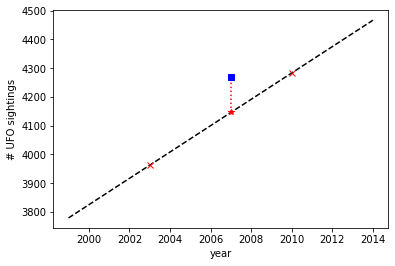

predicted UFO sightings in 2007: 4145.42857142858
actual UFO sightings in 2007: 4269


In [6]:
%matplotlib inline
from matplotlib import pylab as plt

xx = np.arange(1999, 2015)
yy = f(xx)

predict_year = 2007

plt.plot(xx, yy, 'k--')
plt.plot(x[0], y[0], 'rx')
plt.plot(x[1], y[1], 'rx')
plt.plot([predict_year, predict_year], [f(predict_year), true_count[predict_year]], 'r:*')
plt.plot(predict_year, true_count[predict_year], 'bs')
plt.xlabel('year')
plt.ylabel('# UFO sightings')
plt.show()
print(f'predicted UFO sightings in {predict_year}: {f(predict_year)}')
print(f'actual UFO sightings in {predict_year}: {true_count[predict_year]}')


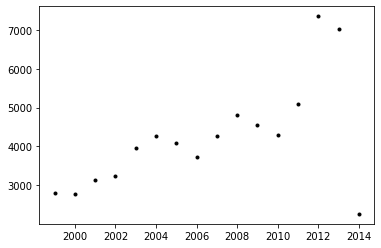

In [7]:
# but, what does the real data look like?
x = np.array(year)
y = np.array(counts)

y = y[x>=1999]
x = x[x>=1999]

plt.plot(x, y, 'k.')
plt.show()


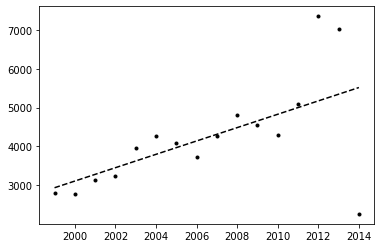

m = [[172.24852941]], b = [-341389.73676471]


In [8]:
# let's find a line that best fits these data
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(np.atleast_2d(x).T, np.atleast_2d(y).T)

yy = model.predict(np.atleast_2d(xx).T).squeeze()

plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'k--')
plt.show()

print(f'm = {model.coef_}, b = {model.intercept_}')


In [15]:
# Let's try a different model... a regression_tree
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(np.atleast_2d(xx).T, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = regr.predict(X_test)

plt.figure()
plt.scatter(xx, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_test, color="cornflowerblue",
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (500,) and (16,)